In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# ******ANN

In [40]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()
len(x_train)
len(x_test)

10000

In [41]:
x_train[0].shape

(28, 28)

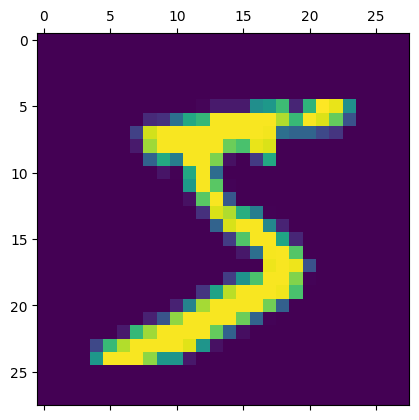

In [42]:
plt.matshow(x_train[0])

In [43]:
x_train=x_train/255
x_test=x_test/255

In [44]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [45]:
x_train_flatten.shape

(60000, 784)

In [46]:
model1=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

In [47]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
model1.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4694 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9257


In [49]:
model1.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 0.9247


[0.2684589624404907, 0.9247000217437744]

In [50]:
predicted=model1.predict(x_test_flatten)
predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.11207159e-02, 3.24172134e-07, 4.21844460e-02, 9.60179090e-01,
       2.75937258e-03, 1.09863155e-01, 1.53854307e-06, 9.99881744e-01,
       9.06157270e-02, 6.38094068e-01], dtype=float32)

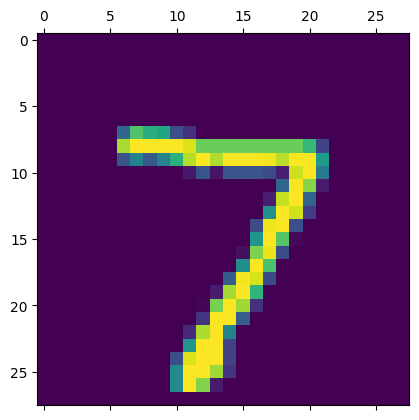

In [51]:
plt.matshow(x_test[0])

In [52]:
import numpy as np
np.argmax(predicted[0])

7

# **With Hidden Layers**

In [53]:
model2=keras.Sequential([
    keras.layers.Dense(300, input_shape=(784,),activation='relu'),keras.layers.Dense(10,activation='sigmoid')
])

In [54]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [55]:
model2.fit(x_train_flatten,y_train,epochs=5)
model2.evaluate(x_test_flatten,y_test)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2211 - accuracy: 0.9350
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0908 - accuracy: 0.9724
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0598 - accuracy: 0.9814
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0434 - accuracy: 0.9858
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0655 - accuracy: 0.9788


[0.0654681846499443, 0.9787999987602234]

313/313 [==============================] - 1s 2ms/step


7

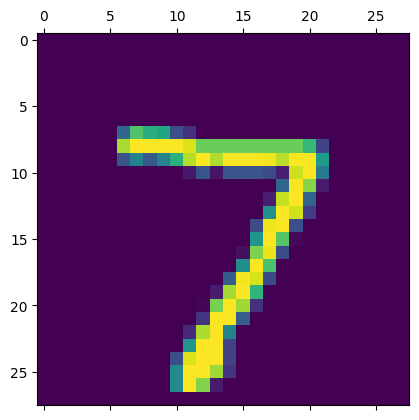

In [56]:
predicted2=model2.predict(x_test_flatten)
predicted2[0]
plt.matshow(x_test[0])

np.argmax(predicted2[0])

# **CNN**

In [57]:
from tensorflow.keras import models
from tensorflow.keras import layers
(c_train,n_train),(c_test,n_test)=keras.datasets.cifar10.load_data()

In [58]:
c_train.shape
c_test.shape

(10000, 32, 32, 3)

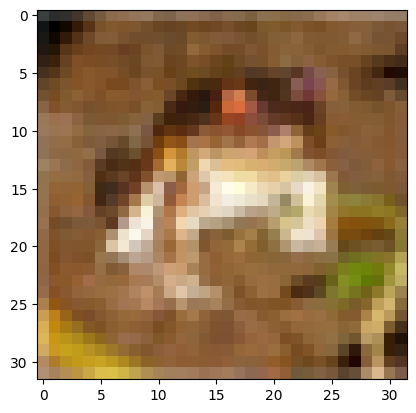

In [59]:
plt.imshow(c_train[0])

In [60]:
c_train=c_train/255.0
c_test=c_test/255.0

In [61]:
ann=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                      layers.Dense(3000, activation='relu'),
                    layers.Dense(1000,activation='relu'),
                      layers.Dense(10, activation='sigmoid')
                      ])

In [62]:
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [63]:
ann.fit(c_train,n_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.8105 - accuracy: 0.3565
Epoch 2/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6233 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5430 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 57s 37ms/step - loss: 1.4826 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4325 - accuracy: 0.4977


In [64]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') 
])

In [65]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
cnn.fit(c_train, n_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4124 - accuracy: 0.4958
Epoch 2/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0758 - accuracy: 0.6255
Epoch 3/5
1563/1563 [==============================] - 27s 18ms/step - loss: 0.9588 - accuracy: 0.6656
Epoch 4/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8728 - accuracy: 0.6962
Epoch 5/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8006 - accuracy: 0.7229


313/313 [==============================] - 2s 6ms/step


3

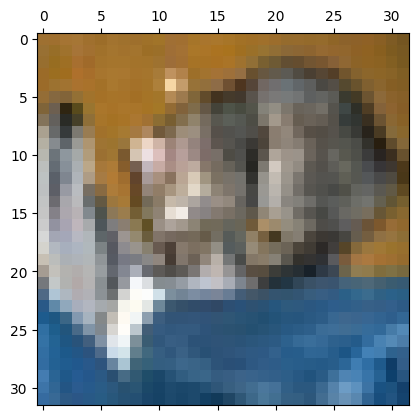

In [66]:
cnn.evaluate(c_test,n_test)
predicted3=cnn.predict(c_test)
predicted3[0]
plt.matshow(c_test[0])
np.argmax(predicted3[0])

# RNN & LSTM

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [68]:
mnist=tf.keras.datasets.mnist
(r_train,l_train),(r_test,l_test)=mnist.load_data()

In [69]:
r_train=r_train/255.0
r_test=r_test/255.0
l_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [70]:
model=Sequential()
model.add(LSTM(128,activation='relu',return_sequences=True))
model.add(LSTM(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [71]:
model.compile( loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [72]:
model.fit(r_train,l_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 94s 49ms/step - loss: 0.4284 - accuracy: 0.8614
Epoch 2/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1108 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0739 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0595 - accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 95s 50ms/step - loss: 0.0467 - accuracy: 0.9864


In [73]:
predicted4=model.predict(r_test)
np.argmax(predicted4[0])


313/313 [==============================] - 8s 24ms/step


7

In [74]:
l_test[0]

7